In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import pickle
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

# What it interesting to investigate:
1. Parameter investiations
    - markov chain length
    - alpha
Strong interaction effects between these 2 - so probably should do them together
But also do individually to show illistrative effect on temperature, objective history plots


    - variations of annealing
    - clipping

# Which configurations to use


# LOAD PICKLE

In [3]:
os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")

['alpha_markov_chain1610569296.5602489.pkl',
 'alpha_markov_chain1610569870.1545694.pkl',
 'alpha_markov_chain1610571641.5611596.pkl',
 'alpha_markov_chain1610576793.1387656.pkl',
 'alpha_markov_chain1610619371.404021.pkl',
 'alpha_markov_chain1610634372.3350122.pkl',
 'alpha_markov_chain1610687756.7576647.pkl',
 'alpha_markov_chain1610785168.832744.pkl',
 'folding1610619842.6646283.pkl',
 'folding1610620406.6242716.pkl',
 'folding1610621930.2851722.pkl',
 'many_dim1610782307.5753639.pkl',
 'many_dim1610782678.4420962.pkl',
 'many_dim1610782755.6754386.pkl',
 'SIMP_only_alpha_markov_chain1610699448.6798203.pkl']

In [4]:
file = 'alpha_markov_chain1610785168.832744.pkl' #os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")[-1]

In [5]:
#result_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/alpha_markov_chain1610571641.5611596.pkl", "rb"))
result_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/" + file, "rb"))

In [6]:
len(result_list)

17200

In [ ]:
"""
SIMP_file  = 'SIMP_only_alpha_markov_chain1610699448.6798203.pkl'
new_SIMPONLY_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/" + SIMP_file, "rb"))
result_list[-200:] = new_SIMPONLY_list
"""

In [ ]:
#result_list = result_list[0:800]

In [7]:
results_df = pd.DataFrame()
for result in result_list:
    results_df = results_df.append(result, ignore_index=True)
results_df.head()

,annealing_alpha,annealing_schedule,archive_minimum_acceptable_dissimilarity,average_runtime,best_performance,best_performance_final,bound_enforcing_method,cholesky_path_length,maximum_archive_length,maximum_function_evaluations,...,mean_performance_final,objective_function,pertubation_method,raw_results,std_perormance,std_perormance_final,step_size_initialisation_fraction_of_range,update_step_size_when_not_accepted_interval,x_bounds,x_length
0,0.5,simple_exponential_cooling,0.2,1.734806,-1554.184851,-1554.184851,not_clipping,5.0,100.0,10000.0,...,-1085.242524,<function rana_func at 0x000001F8643BA700>,Cholesky,"[-581.7538406678291, -1171.770814227994, -673....",227.329452,227.329452,0.01,1.0,"(-500, 500)",5.0
1,0.5,simple_exponential_cooling,0.2,1.141566,-1516.038465,-1516.038465,not_clipping,5.0,100.0,10000.0,...,-1151.254501,<function rana_func at 0x000001F8643BA700>,Cholesky,"[-622.8118310789018, -1345.6640117934403, -770...",239.753954,239.753954,0.01,4.0,"(-500, 500)",5.0
2,0.5,simple_exponential_cooling,0.2,1.029318,-1664.590308,-1664.590308,not_clipping,5.0,100.0,10000.0,...,-1148.491634,<function rana_func at 0x000001F8643BA700>,Cholesky,"[-594.3257447831004, -1345.6868292571316, -770...",248.237234,248.237234,0.01,7.0,"(-500, 500)",5.0
3,0.5,simple_exponential_cooling,0.2,1.144416,-1725.926052,-1725.926052,not_clipping,5.0,100.0,10000.0,...,-1170.596172,<function rana_func at 0x000001F8643BA700>,Cholesky,"[-594.3631642797939, -1345.534305511185, -784....",260.705628,260.705628,0.01,10.0,"(-500, 500)",5.0
4,0.5,simple_exponential_cooling,0.2,1.143314,-1725.930201,-1725.930201,not_clipping,5.0,100.0,10000.0,...,-1164.069463,<function rana_func at 0x000001F8643BA700>,Cholesky,"[-594.3599016682881, -1317.569868499288, -784....",261.280926,261.280926,0.01,13.0,"(-500, 500)",5.0


In [20]:
results_df.shape

(17200, 22)

In [21]:
#results_df.loc[results_df["pertubation_method"] == "Cholesky"]["annealing_alpha"].unique()

In [22]:
n_markov_points = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["maximum_markov_chain_length"].unique().shape[0]
n_pertubation_points = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["annealing_alpha"].unique().shape[0]
n_markov_points, n_pertubation_points

(20, 20)

In [23]:
results_df["update_step_size_when_not_accepted_interval"].unique()

array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 32., 35., 38.,
       41., 44., 47., 50., 53., 56., 60.,  0., nan])

# Make Output Table (TODO) 
- outputs dataframe that can to_html into latex

In [24]:
def get_best_values_and_return_dict(spec_names, spec_vals, output_names= ["pertubation_method", "maximum_markov_chain_length", "annealing_alpha", "update_step_size_when_not_accepted_interval", \
               "mean_performance_final", "std_perormance_final", "best_performance_final", "mean_performance", "average_runtime"]):
    df = results_df
    for spec_name, spec_val in zip(spec_names, spec_vals):
        df = df.loc[results_df[spec_name] == spec_val]
    argmin_indx = df["mean_performance_final"].argmin()
    output_dict = {}
    for output_name in output_names:
        output_dict[output_name] = df.iloc[argmin_indx][output_name]
    return output_dict

In [25]:
report_table = pd.DataFrame()
for pertubation_method in ["Cholesky", "Diagonal", "simple"]:
    if pertubation_method in ["Cholesky", "Diagonal"]:
        spec_names = ["pertubation_method", "update_step_size_when_not_accepted_interval"]; spec_vals = [pertubation_method, 0]
        output_dict = get_best_values_and_return_dict(spec_names, spec_vals)
        report_table = report_table.append(output_dict, ignore_index=True)
    
    spec_names = ["pertubation_method"]; spec_vals = [pertubation_method] # overall best
    output_dict = get_best_values_and_return_dict(spec_names, spec_vals)
    report_table = report_table.append(output_dict, ignore_index=True)

In [26]:
column_order = ["pertubation_method", "update_step_size_when_not_accepted_interval", "maximum_markov_chain_length", "annealing_alpha",  \
               "mean_performance_final", "std_perormance_final", "best_performance_final", "mean_performance", "average_runtime"]
report_table = report_table[column_order]
report_table

,pertubation_method,update_step_size_when_not_accepted_interval,maximum_markov_chain_length,annealing_alpha,mean_performance_final,std_perormance_final,best_performance_final,mean_performance,average_runtime
0,Cholesky,0.0,33.0,0.757895,-1422.299684,170.323895,-1781.497920,-1422.299684,0.747163
1,Cholesky,10.0,160.0,0.938421,-1579.815309,150.919306,-1787.847485,-1616.758050,7.089763
2,Diagonal,0.0,62.0,0.964211,-1540.729503,144.886429,-1850.158864,-1569.419792,4.843221
3,Diagonal,25.0,301.0,0.680526,-1663.541639,125.233844,-1896.890769,-1670.829833,2.990296
4,simple,NaN,566.0,0.628947,-1479.821485,184.184489,-1767.620335,-1533.242909,3.745896


In [27]:
rename_dict = {"pertubation_method": "step method", 
               "update_step_size_when_not_accepted_interval": "diversified-step-update-rule interval", 
               "maximum_markov_chain_length": "max markov chain length",
               "annealing_alpha": "annealing alpha",
               "mean_performance_final": "mean final performance", 
               "std_perormance_final": "std dev final performance", 
               "best_performance_final": "best final performance (across seeds)", 
               "mean_performance": "mean best objective (within run)", 
               "average_runtime": "average runtime (s)",
}
report_table = report_table.rename(columns = rename_dict)
report_table = report_table.round(2)

In [28]:
report_table.T.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n      <th>4</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>step method</th>\n      <td>Cholesky</td>\n      <td>Cholesky</td>\n      <td>Diagonal</td>\n      <td>Diagonal</td>\n      <td>simple</td>\n    </tr>\n    <tr>\n      <th>diversified-step-update-rule interval</th>\n      <td>0</td>\n      <td>10</td>\n      <td>0</td>\n      <td>25</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>max markov chain length</th>\n      <td>33</td>\n      <td>160</td>\n      <td>62</td>\n      <td>301</td>\n      <td>566</td>\n    </tr>\n    <tr>\n      <th>annealing alpha</th>\n      <td>0.76</td>\n      <td>0.94</td>\n      <td>0.96</td>\n      <td>0.68</td>\n      <td>0.63</td>\n    </tr>\n    <tr>\n      <th>mean final performance</th>\n      <td>-1422.3</td>\n      <td>-1579.82</td>\n      <td>-1540.

# Best overall

In [29]:
def get_best_values_and_print(spec_names, spec_vals, output_names):
    df = results_df
    for spec_name, spec_val in zip(spec_names, spec_vals):
        df = df.loc[results_df[spec_name] == spec_val]
    argmin_indx = df["mean_performance_final"].argmin()
    #argmin_indx = df["mean_performance"].argmin()
    for output_name in output_names:
        print(f"{output_name} = {df.iloc[argmin_indx][output_name]}")

In [ ]:
spec_names = ["pertubation_method"]; spec_vals = ["Cholesky"];
output_names = ["maximum_markov_chain_length", "annealing_alpha", "update_step_size_when_not_accepted_interval", \
               "mean_performance_final", "best_performance_final", "mean_performance"]
get_best_values_and_print(spec_names, spec_vals, output_names)

In [ ]:
spec_names = ["pertubation_method"]; spec_vals = ["Diagonal"];
output_names = ["maximum_markov_chain_length", "annealing_alpha", "update_step_size_when_not_accepted_interval", \
               "mean_performance_final", "best_performance_final"]
get_best_values_and_print(spec_names, spec_vals, output_names)

In [ ]:
spec_names = ["pertubation_method"]; spec_vals = ["simple"];
output_names = ["maximum_markov_chain_length", "annealing_alpha", "update_step_size_when_not_accepted_interval", \
               "mean_performance_final", "best_performance_final"]
get_best_values_and_print(spec_names, spec_vals, output_names)

# Best vals for chol with close to optimal interval of 5

In [ ]:
df = results_df.loc[(results_df["pertubation_method"] == "Cholesky") & \
                    (results_df["update_step_size_when_not_accepted_interval"] == 5)]

In [ ]:
argmin_indx = df["mean_performance_final"].argmin()
best_mc = df.iloc[argmin_indx]["maximum_markov_chain_length"]
best_alpha = df.iloc[argmin_indx]["annealing_alpha"]
print(f"""best MC is {best_mc}, alpha is {best_alpha}, which gets mean of {df["mean_performance_final"].min()}""")

# Best vals for diag with close to optimal interval of 50

In [ ]:
df = results_df.loc[(results_df["pertubation_method"] == "Diagonal") & \
                    (results_df["update_step_size_when_not_accepted_interval"] == 50)]
argmin_indx = df["mean_performance_final"].argmin()
best_mc = df.iloc[argmin_indx]["maximum_markov_chain_length"]
best_alpha = df.iloc[argmin_indx]["annealing_alpha"]
print(f"""best MC is {best_mc}, alpha is {best_alpha}, which gets mean of {df["mean_performance_final"].min()}""")

In [30]:
def plot_and_save(pertubation_method, update_step_size_when_not_accepted_interval):
    df = results_df.loc[(results_df["pertubation_method"] == pertubation_method) & \
                    (results_df["update_step_size_when_not_accepted_interval"] == update_step_size_when_not_accepted_interval)]
    
    fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
    #fig, ax = plt.subplots(2,1, figsize=(6,5), constrained_layout=True)
    #labels = ["final f(x)", "std f(x)", "time (s)"]
    #for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
    labels = ["mean final f(x)", "mean runtime (s)"]
    for i, column in enumerate(["mean_performance_final", "average_runtime"]):
        x1 = df["annealing_alpha"].to_numpy().reshape(n_markov_points,n_pertubation_points)
        x2 = df["maximum_markov_chain_length"].to_numpy().reshape(n_markov_points,n_pertubation_points)
        z = df[column].to_numpy().reshape(n_markov_points,n_pertubation_points)
        plot_list = []
        
        cs = ax[i].contourf(x1,x2,z, levels=20)
        CB = fig.colorbar(cs, label=labels[i], ax=ax[i], location='top')
        tick_locator = mpl.ticker.MaxNLocator(nbins=5)
        CB.locator = tick_locator
        CB.update_ticks()
        #ax[i].set_yscale("log")

    ax[0].set_ylabel("Max MC length")
    #ax[1].set_ylabel("Max MC length")
    ax[0].set_xlabel("alpha")
    ax[1].set_xlabel("alpha")
    #fig.tight_layout()
    return fig, ax

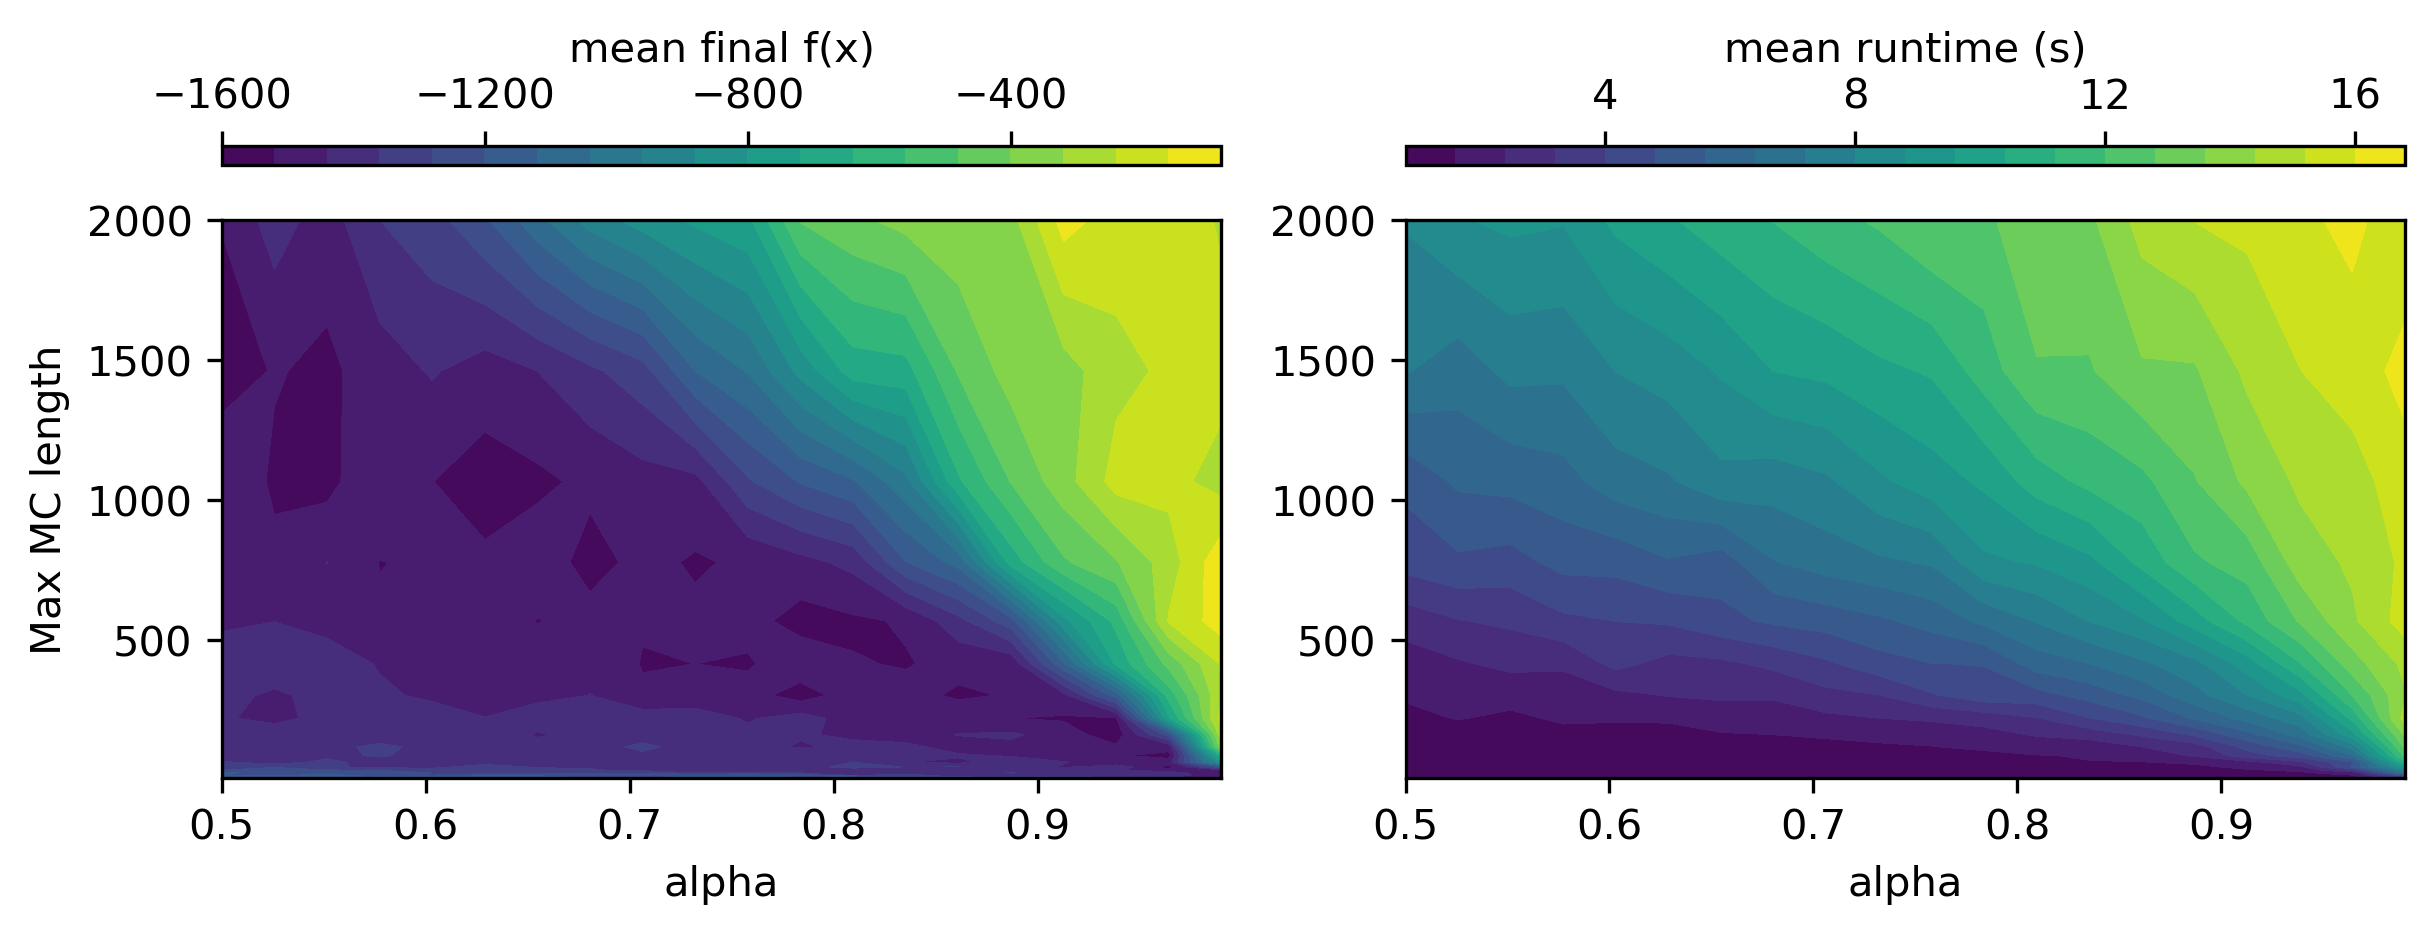

In [32]:
fig, ax = plot_and_save("Cholesky",  13)
fig.savefig("./Figures/SE5D_CHOL_MC_alpha_contour.png")

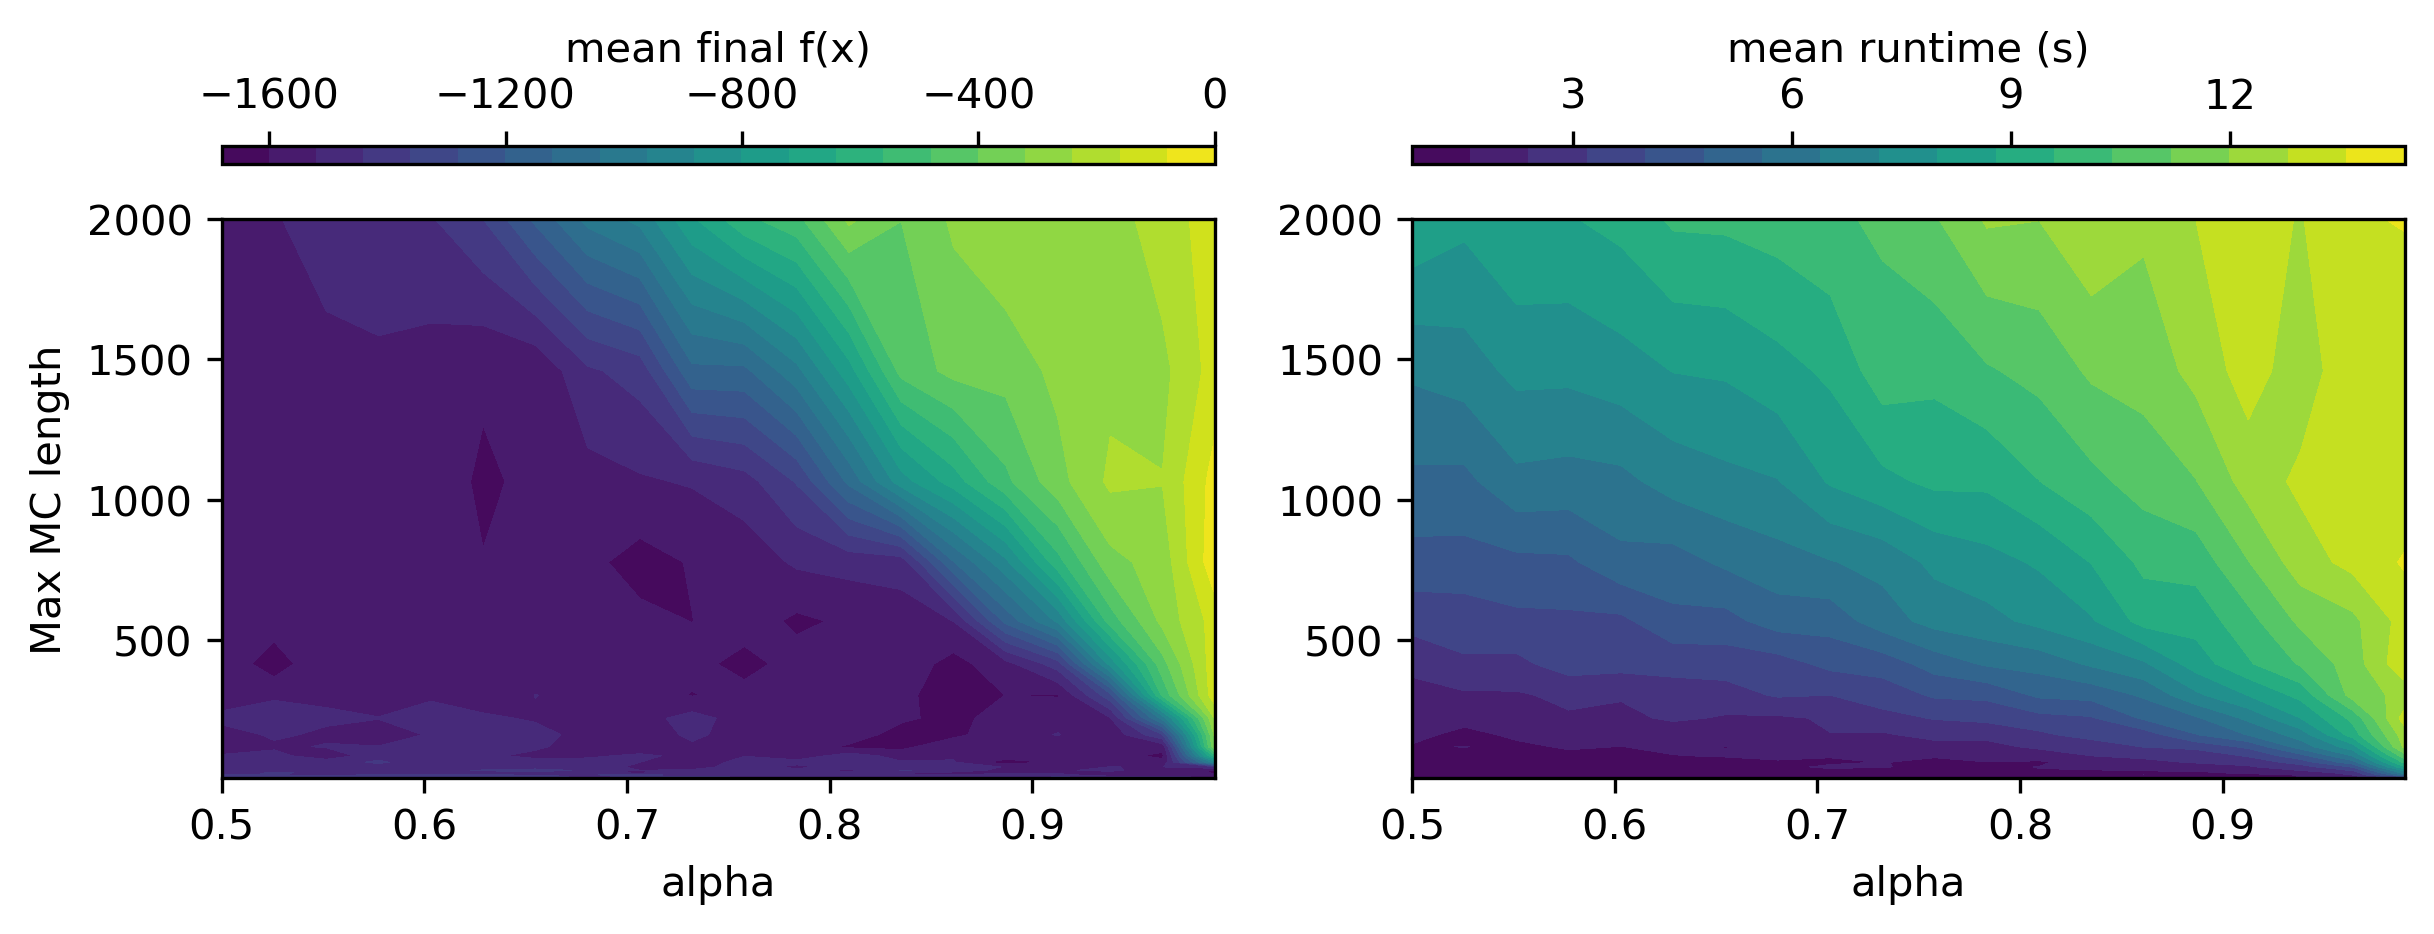

In [34]:
plot_and_save("Diagonal",  19)
fig.savefig("./Figures/SE5D_DIAG_MC_alpha_contour.png")

In [ ]:
plot_and_save("Cholesky",  1)

# OLD

In [ ]:
n_points = 20
fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["final f(x)", "time (s)"]
for i, column in enumerate(["mean_performance_final", "average_runtime"]):
    x1 = df["annealing_alpha"].to_numpy().reshape(n_markov_points,n_pertubation_points)
    x2 = df["maximum_markov_chain_length"].to_numpy().reshape(n_markov_points,n_pertubation_points)
    z = df[column].to_numpy().reshape(n_markov_points,n_pertubation_points)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i], location='top')
    tick_locator = mpl.ticker.MaxNLocator(nbins=4)
    CB.locator = tick_locator
    CB.update_ticks()
    ax[i].set_yscale("log")

ax[0].set_ylabel("Max MC length")
#ax[1].set_ylabel("Max MC length")
ax[0].set_xlabel("alpha")
ax[1].set_xlabel("alpha")
#fig.tight_layout()

In [ ]:
n_points = 20
fig, ax = plt.subplots(1,2, figsize=(8,3))
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["final f(x)", "time (s)"]
for i, column in enumerate(["mean_performance_final", "average_runtime"]):
    x1 = results_df.loc[results_df["pertubation_method"] == "Diagonal"]["annealing_alpha"].to_numpy().reshape(n_points,n_points)
    x2 = results_df.loc[results_df["pertubation_method"] == "Diagonal"]["maximum_markov_chain_length"].to_numpy().reshape(n_points,n_points)
    z = results_df.loc[results_df["pertubation_method"] == "Diagonal"][column].to_numpy().reshape(n_points,n_points)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i])
    tick_locator = mpl.ticker.MaxNLocator(nbins=3)
    CB.locator = tick_locator
    CB.update_ticks()
fig.tight_layout()

# OLD stuff

In [ ]:
Chol_config = {"pertubation_method": "Cholesky",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.01,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

Simple_config = {"pertubation_method": "simple",
                     "x_length": 2,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

Diag_config = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

# markov chain

In [ ]:
def run_and_add_to_df(current_val, config, dataframe, n_runs=3, summary_stats = False):
    #try:
        results = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=config, n_iterations=n_runs)
        mean_performance = np.mean(results[:, 1])
        best_performance = np.min(results[:, 1])
        std_perormance = np.std(results[:, 1])
        average_runtime = np.mean(results[:, 2])
        config_result = config.copy()
        config_result["raw_results"] = results[:, 1]
        config_result["mean_performance"] = mean_performance
        config_result["best_performance"] = best_performance
        config_result["std_perormance"] = std_perormance
        config_result["average_runtime"] = average_runtime
        return dataframe.append(config_result, ignore_index=True)
   # except:
    #    print(f'failure for {config["pertubation_method"], current_val}'

In [ ]:
markov_chain_df = pd.DataFrame()
n_runs = 30
for maximum_markov_chain_length in np.logspace(0, np.log10(2000), 20, dtype="int"): # [5, 10, 20, 30, 40, 50, 70, 100, 200, 300, 400, 500,600, 700, 800, 900, 1000]:
        Chol_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Chol_config, markov_chain_df, n_runs=n_runs)
        Diag_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Diag_config, markov_chain_df, n_runs=n_runs)
        Simple_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Simple_config, markov_chain_df, n_runs=n_runs)

In [ ]:
with open("./Simlated_Annealing_Notebooks/stored_data/markov_chain_varying.pkl", "wb") as f:
    pickle.dump(markov_chain_df, f)
#markov_chain_df = pickle.load(open("./Simlated_Annealing_Notebooks/stored_data/markov_chain_varying.pkl", "rb"))

In [ ]:
import matplotlib.patheffects as pe
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], np.stack(mini_df["raw_results"].to_numpy(), axis=0), "o",
        color=cols[i],markersize=2.5)

for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], mini_df["mean_performance"], label = pertubation_method,
            color=cols[i], markersize=2.5, linestyle="-", 
             lw=2, path_effects=[pe.Stroke(linewidth=3, foreground='g'), pe.Normal()])
plt.legend()
plt.show()
#fig.savefig("./Figures/SE5D_varying_markov_chain.png")

"""
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], mini_df["mean_performance"], label = pertubation_method,
            color=cols[i], marker="o",markersize=2.5, linestyle="-")
plt.legend()
"""
"""
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], np.stack(mini_df["raw_results"].to_numpy(), axis=0), "o",
        color=cols[i],markersize=2.5)
"""

# Markov Chain and Annealing Alpha

In [ ]:
markov_chain_alpha_df = pd.DataFrame()
annealing_alpha_z = [0.8, 0.9, 0.95, 0.99]
n_runs = 30
for maximum_markov_chain_length in np.logspace(0, np.log10(2000), 20, dtype="int"):
    for annealing_alpha in annealing_alpha_z:
        Chol_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Chol_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Chol_config, markov_chain_alpha_df, n_runs=n_runs)
        
        Diag_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Diag_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Diag_config, markov_chain_alpha_df, n_runs=n_runs)
        
        Simple_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Simple_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Simple_config, markov_chain_alpha_df, n_runs=n_runs)

In [ ]:
with open("./Simlated_Annealing_Notebooks/stored_data/alphamarkov_chain_varying.pkl", "wb") as f:
    pickle.dump(markov_chain_alpha_df, f)

In [ ]:
fig, axs = plt.subplots(2,2)
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_alpha_df[markov_chain_alpha_df["pertubation_method"] == pertubation_method]
    for j, annealing_alpha in enumerate(annealing_alpha_z):
        row = int(j/2)
        col = j % 2
        teeny_df = mini_df[mini_df["annealing_alpha"] == annealing_alpha]
        teeny_df = teeny_df.sort_values(by="maximum_markov_chain_length",ascending=True)
        axs[row, col].plot(teeny_df["maximum_markov_chain_length"], teeny_df["mean_performance"], label = pertubation_method,
                color=cols[i], marker="o",markersize=2.5, linestyle="-")
        axs[row, col].set_title(f"alpha = {annealing_alpha}")
axs[0,0].legend()
fig.tight_layout()

# Before Optimisation

In [ ]:
results_chol = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Chol_config)
mean_performance = np.mean(results_chol[:, 1])
best_performance = np.min(results_chol[:, 1])
std_perormance = np.std(results_chol[:, 1])
average_runtime = np.mean(results_chol[:, 2])


In [ ]:
results_df = pd.DataFrame(data=[mean_performance, best_performance, std_perormance,  average_runtime], columns=["Cholsky"], index=["mean_performance", "best_performance", "std_perormance",  "average_runtime"])
results_df

In [ ]:
results_diag = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Diag_config)
mean_performance = np.mean(results_diag[:, 1])
best_performance = np.min(results_diag[:, 1])
std_perormance = np.std(results_diag[:, 1])
average_runtime = np.mean(results_diag[:, 2])
results_df["Diagonal"] = [mean_performance, best_performance, std_perormance,  average_runtime]


results_simple = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Simple_config)
mean_performance = np.mean(results_simple[:, 1])
best_performance = np.min(results_simple[:, 1])
std_perormance = np.std(results_simple[:, 1])
average_runtime = np.mean(results_simple[:, 2])
results_df["Simple"] = [mean_performance, best_performance, std_perormance,  average_runtime]
results_df

In [ ]:
maximum_markov_chain_length

In [ ]:
Chol_config